In [1]:
import math
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

# 1. Contents
1. Decision Tree
2. Naïve Bayes
3. Logistic Regression 
4. K Nearest Neighbor

# 2. What is Classfication
## (1). Binary Classfication
- can you calssify people what will buy the computer and the other?
<table>
<tr><td>age</td><td>income</td><td>student</td><td>credit_rating</td><td>buys_computer</td></tr>
<tr><td><=30</td><td>high</td><td>no</td><td>fair</td><td>no</td></tr>
<tr><td><=30</td><td>high</td><td>no</td><td>excellent</td><td>no</td></tr>
<tr><td>30…40</td><td>high</td><td>no</td><td>fair</td><td>yes</td></tr>
<tr><td>>40</td><td>medium</td><td>no</td><td>fair</td><td>yes</td></tr>
<tr><td>>40</td><td>low</td><td>yes</td><td>fair</td><td>yes</td></tr>
<tr><td>>40</td><td>low</td><td>yes</td><td>excellent</td><td>no</td></tr>
<tr><td>31…40</td><td>low</td><td>yes</td><td>excellent</td><td>yes</td></tr>
<tr><td><=30</td><td>medium</td><td>no</td><td>fair</td><td>no</td></tr>
<tr><td><=30</td><td>low</td><td>yes</td><td>fair</td><td>yes</td></tr>
<tr><td>>40</td><td>medium</td><td>yes</td><td>fair</td><td>yes</td></tr>
<tr><td><=30</td><td>medium</td><td>yes</td><td>excellent</td><td>yes</td></tr>
<tr><td>31…40</td><td>medium</td><td>no</td><td>excellent</td><td>yes</td></tr>
<tr><td>31…40</td><td>high</td><td>yes</td><td>fair</td><td>yes</td></tr>
<tr><td>>40</td><td>medium</td><td>no</td><td>excellent</td><td>no</td></tr>
</table>
<br/>
<br/>

- can you calssify if two sentences are asking the same questions or not?
<table>
<tr><td>id</td><td>qid1</td><td>qid2</td><td>question1</td><td>question2</td><td>is_duplicate</td></tr>
<tr><td>0</td><td>1</td><td>2</td><td>What is the step by step guide to invest in share market in india?</td><td>What is the step by step guide to invest in share market?</td><td>0</td></tr>
<tr><td>1</td><td>3</td><td>4</td><td>What is the story of Kohinoor (Koh-i-Noor) Diamond?</td><td>What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?</td><td>0</td></tr>
<tr><td>2</td><td>5</td><td>6</td><td>How can I increase the speed of my internet connection while using a VPN?</td><td>How can Internet speed be increased by hacking through DNS?</td><td>0</td></tr>
<tr><td>3</td><td>7</td><td>8</td><td>Why am I mentally very lonely? How can I solve it?</td><td>Find the remainder when [math]23^{24}[/math] is divided by 24,23?</td><td>0</td></tr>
<tr><td>4</td><td>9</td><td>10</td><td>Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?</td><td>Which fish would survive in salt water?</td><td>0</td></tr>
<tr><td>5</td><td>11</td><td>12</td><td>Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?</td><td>I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?</td><td>1</td></tr>
<tr><td>6</td><td>13</td><td>14</td><td>Should I buy tiago?</td><td>What keeps childern active and far from phone and video games?</td><td>0</td></tr>
<tr><td>7</td><td>15</td><td>16</td><td>How can I be a good geologist?</td><td>What should I do to be a great geologist?</td><td>1</td></tr>
<tr><td>8</td><td>17</td><td>18</td><td>When do you use シ instead of し?</td><td>When do you use ""&"" instead of ""and""?</td><td>0</td></tr>
<tr><td>9</td><td>19</td><td>20</td><td>Motorola (company): Can I hack my Charter Motorolla DCX3400?</td><td>How do I hack Motorola DCX3400 for free internet?</td><td>0</td></tr>
<tr><td>10</td><td>21</td><td>22</td><td>Method to find separation of slits using fresnel biprism?</td><td>What are some of the things technicians can tell about the durability and reliability of Laptops and its components?</td><td>0</td></tr>
<tr><td>11</td><td>23</td><td>24</td><td>How do I read and find my YouTube comments?</td><td>How can I see all my Youtube comments?</td><td>1</td></tr>
<tr><td>12</td><td>25</td><td>26</td><td>What can make Physics easy to learn?</td><td>How can you make physics easy to learn?</td><td>1</td></tr>
</table>
<br/>
<br/>

- classfy if a image is a cat?
<img src="images/catImgs.JPG"/>

## (1). Multiple Class Classfication
- how to classfy news into different category
- how to classfy flowers into different type? (if you have height and with of its petals(花瓣) and specals(萼片))

In [2]:
df = pd.DataFrame(iris.data)
folwer_type = {
    0:iris.target_names[0],
    1:iris.target_names[1],
    2:iris.target_names[2],
}
df.columns = iris.feature_names


df['type'] = [folwer_type.get(i) for i in iris.target]
df1 = df[df['type'] == list(folwer_type.values())[0]][:5].copy()
df2 = df[df['type'] == list(folwer_type.values())[1]][:5].copy()
df3 = df[df['type'] == list(folwer_type.values())[2]][:5].copy()
pd.concat([df1, df2, df3])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


# 1. Decision Tree
## (1). explaination
classfy data into multiple classfication rules.
For example, thansfer this table
<table>
<tr><td>age</td><td>income</td><td>student</td><td>credit_rating</td><td>buys_computer</td></tr>
<tr><td><=30</td><td>high</td><td>no</td><td>fair</td><td>no</td></tr>
<tr><td><=30</td><td>high</td><td>no</td><td>excellent</td><td>no</td></tr>
<tr><td>31…40</td><td>high</td><td>no</td><td>fair</td><td>yes</td></tr>
<tr><td>>40</td><td>medium</td><td>no</td><td>fair</td><td>yes</td></tr>
<tr><td>>40</td><td>low</td><td>yes</td><td>fair</td><td>yes</td></tr>
<tr><td>>40</td><td>low</td><td>yes</td><td>excellent</td><td>no</td></tr>
<tr><td>31…40</td><td>low</td><td>yes</td><td>excellent</td><td>yes</td></tr>
<tr><td><=30</td><td>medium</td><td>no</td><td>fair</td><td>no</td></tr>
<tr><td><=30</td><td>low</td><td>yes</td><td>fair</td><td>yes</td></tr>
<tr><td>>40</td><td>medium</td><td>yes</td><td>fair</td><td>yes</td></tr>
<tr><td><=30</td><td>medium</td><td>yes</td><td>excellent</td><td>yes</td></tr>
<tr><td>31…40</td><td>medium</td><td>no</td><td>excellent</td><td>yes</td></tr>
<tr><td>31…40</td><td>high</td><td>yes</td><td>fair</td><td>yes</td></tr>
<tr><td>>40</td><td>medium</td><td>no</td><td>excellent</td><td>no</td></tr>
</table>
into ...
<img src="images/decisionTree.JPG" width="500px"/>



## (2). Which attribute should we use earlier
- we see the information gain before and after the classfication.
- how to see information quantity? Entropy 
- Entropy of message M with alphabet {m1, m2, …,mn}
$$(M) = - \sum\limits_{i=1}^n p(m_{i}) log_{2} p(m_{i})$$

where p(mi) is the probability that mi in M will occur
- For example
<img src="images/entropy.JPG" width="700px"/>
<img src="images/informationGain.JPG" width="700px"/>

- As a result, information gain can be defined as
$$Before(p, n) = -\frac{p}{p+n} log_{2}(\frac{p}{p+n}) - \frac{n}{p+n} log_{2}(\frac{n}{p+n})$$
$$After(A) = \sum\limits_{i=1}^v -\frac{p_{i} + n_{i}}{p+n} I(p_{i}, n_{i})$$
$$Information Gain = Before(p, n) - After(A)$$

- use age as first rule to classfy 

In [3]:
df = pd.read_csv("dataset\\buy_computers")
df.groupby(['age','buys_computer']).count()

income  student  credit_rating
age   buys_computer                                
30…40 yes                 4        4              4
<=30  no                  3        3              3
      yes                 2        2              2
>40   no                  2        2              2
      yes                 3        3              3

we can sort it out like this
<table>
<tr>
<td>age</td><td>count</td><td>p_count</td><td>n_count</td>
</tr>
<tr>
<td><=30</td><td>4</td><td>2</td><td>3</td>
</tr>
<tr>
<td>30...40</td><td>4</td><td>4</td><td>0</td>
</tr>
<tr>
<td>>40</td><td>4</td><td>5</td><td>2</td>
</tr>
</table>

In [4]:
def log2(x):
    return math.log(x, 2)

def entropy(p, n):
    pp = p/(p+n)
    pn = n/(p+n)
    lpp = - (pp * log2(pp)) if pp != 0 else 0
    lpn = - (pn * log2(pn)) if pn != 0 else 0
    return lpp + lpn  

dataLi = []
data = {"count":5, "p_count":2, "n_count":3}
dataLi.append(data)
data = {"count":4, "p_count":4, "n_count":0}
dataLi.append(data)
data = {"count":5, "p_count":3, "n_count":2}
dataLi.append(data)
df = pd.DataFrame(dataLi)
df

,count,n_count,p_count
0,5,3,2
1,4,0,4
2,5,2,3


In [5]:
def cal_entropy(row):
    row['entropy'] = entropy(row['p_count'], row['n_count'])
    return row

df = df.apply(cal_entropy, axis=1)
print(df)

After = 0
for row in df.iterrows():
    row = row[1]
    percentage = row['count']/sum(df['count'])
    After += percentage * row['entropy']
print("weighted entropy:", After)


df = pd.read_csv("dataset\\buy_computers")
Before = entropy(len(df[df['buys_computer'] == "yes"]), len(df[df['buys_computer'] == "no"]))
print("Before:", Before)
print("Information Gain:", Before - After)

   count  n_count  p_count   entropy
0    5.0      3.0      2.0  0.970951
1    4.0      0.0      4.0  0.000000
2    5.0      2.0      3.0  0.970951
weighted entropy: 0.693536138896
Before: 0.9402859586706309
Information Gain: 0.246749819774


- Similarly
$$Gain(income) = 0.029$$
$$Gain(student) = 0.151$$
$$Gain(credit\_rating) = 0.048$$
- so we choose age as the first rule

## (3). use decision tree

In [6]:
from sklearn import tree

In [7]:
df = pd.DataFrame(iris.data)
folwer_type = {
    0:iris.target_names[0],
    1:iris.target_names[1],
    2:iris.target_names[2],
}
df.columns = iris.feature_names
df['type'] = [folwer_type.get(i) for i in iris.target]

df1 = df[df['type'] == list(folwer_type.values())[0]][:5].copy()
df2 = df[df['type'] == list(folwer_type.values())[1]][:5].copy()
df3 = df[df['type'] == list(folwer_type.values())[2]][:5].copy()
pd.concat([df1, df2, df3])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


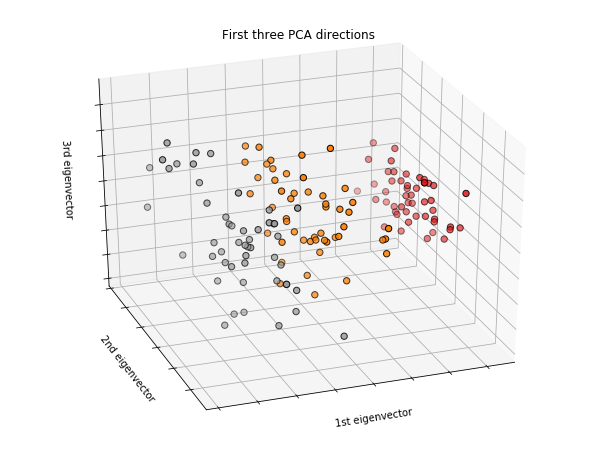

In [9]:
X = iris.data
Y = iris.target


fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=Y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [10]:
# data description
X = iris.data
Y = iris.target
print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [11]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

y_pred = clf.predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d" % (iris.data.shape[0],(iris.target != y_pred).sum()))

Number of mislabeled points out of a total 150 points : 0


In [12]:
0.3 * 0.666 *2

0.3996

# 2. Naïve Bayes
## (1). Theory 
- Bayes theorem: 
    - $P(C|X) = P(X|C)·P(C) / P(X)$
    - $P(C): possibility\ of\ C$
    - $P(C|X): possibility\ of\ C\ under\ condition X$
- Explaiation: 
    - 10人，3人喜歡看書，5人是女生，是女生且喜歡看書者2人，請問假設已知甲為女生，她喜歡看書的機率是多少?
    - P(喜歡看書|女)=P(女|喜歡看書)*P(喜歡看書)/P(女)
    - P(女|喜歡看書) = P({女}$\cap${喜歡看書})/P(喜歡看書) = 2/3
    - (2/3) * (3/10) / (5/10) = 0.3996
- Data

In [13]:
df = pd.read_csv("dataset\\playTennis.csv")
print("P(Postive) = ", len(df[df['play tennis'] == "P"]), "/", len(df))
print("P(Negative) = ", len(df[df['play tennis'] == "N"]), "/", len(df))
print("P(Sunny|Postive) = ", len(df[df['play tennis'] == "P"][df['Outlook'] == "sunny"]), "/", len(df[df['play tennis'] == "P"]))
print("P(Sunny|Negative) = ", len(df[df['play tennis'] == "N"][df['Outlook'] == "sunny"]), "/", len(df[df['play tennis'] == "N"]))
df

P(Postive) =  9 / 14
P(Negative) =  5 / 14
P(Sunny|Postive) =  2 / 9
P(Sunny|Negative) =  3 / 5


c:\users\jeremy\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
c:\users\jeremy\appdata\local\programs\python\python35\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,Outlook,Temperature,Humidity,Windy,play tennis
0,sunny,hot,high,False,N
1,sunny,hot,high,True,N
2,overcast,hot,high,False,P
3,rain,mild,high,False,P
4,rain,cool,normal,False,P
5,rain,cool,normal,True,N
6,overcast,cool,normal,True,P
7,sunny,mild,high,False,N
8,sunny,cool,normal,False,P
9,rain,mild,normal,False,P


可以整理成=>
<table>
<tr><td>Outlook</td><td></td><td></td><td>Tempreature</td><td></td><td></td><td>Humidity</td><td></td><td></td><td>Windy</td><td></td><td></td></tr>
<tr><td></td><td>Condition P</td><td>Condition N</td><td></td><td>Condition P</td><td>Condition N</td><td></td><td>Condition P</td><td>Condition N</td><td></td><td>Condition P</td><td>Condition N</td></tr>
<tr><td>sunny</td><td>2/9</td><td>3/5</td><td>hot</td><td>2/9</td><td>2/5</td><td>high</td><td>3/9</td><td>4/5</td><td>true</td><td>3/9</td><td>3/5</td></tr>
<tr><td>overcast</td><td>4/9</td><td>0</td><td>mild</td><td>4/9</td><td>2/5</td><td>normal</td><td>6/9</td><td>1/5</td><td>false</td><td>6/9</td><td>2/5</td></tr>
<tr><td>rain</td><td>3/9</td><td>2/5</td><td>cool</td><td>3/9</td><td>1/5</td><td></td><td></td><td></td><td></td><td></td><td></td></tr>
</table>


$P(p|X), P(n|X), X = rain, hot, high, false$, which is maximum?
$$P(p|X)=P(X|p)·P(p)/P(X)$$ 
$$P(n|X)=P(X|n)·P(n)/P(X)$$
$$因為是比較，分母可以忽略$$
$$P(X|p)·P(p)=P(rain, hot, high, false|p)·P(p) $$
$$\thickapprox P(rain|p)·P(hot|p)·P(high|p)·P(false|p)·P(p)$$ 
$$=3/9·2/9·3/9·6/9·9/14=0.010582$$
$$P(X|n)·P(n)=P(rain, hot, high, false|n)·P(n) $$
$$\thickapprox P(rain|n)·P(hot|n)·P(high|n)·P(false|n)·P(n) $$
$$=2/5·2/5·4/5·2/5·5/14=0.018286$$

## (2). use Naïve Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [15]:
X = iris.data
Y = iris.target

y_pred = gnb.fit(iris.data, iris.target).predict(X)
print("Number of mislabeled points out of a total %d points : %d" % (iris.data.shape[0],(iris.target != y_pred).sum()))

Number of mislabeled points out of a total 150 points : 6


In [16]:
# indeices = [num for num, value in enumerate(iris.target != y_pred) if value == True]
df = pd.DataFrame(iris.data)
folwer_type = {
    0:iris.target_names[0],
    1:iris.target_names[1],
    2:iris.target_names[2],
}
df.columns = iris.feature_names
df['type_name'] = [folwer_type.get(i) for i in iris.target]
df['type'] = iris.target
df['yhat'] = y_pred
df[df["type"] != df['yhat']]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type_name,type,yhat
52,6.9,3.1,4.9,1.5,versicolor,1,2
70,5.9,3.2,4.8,1.8,versicolor,1,2
77,6.7,3.0,5.0,1.7,versicolor,1,2
106,4.9,2.5,4.5,1.7,virginica,2,1
119,6.0,2.2,5.0,1.5,virginica,2,1
133,6.3,2.8,5.1,1.5,virginica,2,1


# 3. logistic regression
## (1). Theory 
- $\hat{y} = \alpha x_{1} + \beta x_{2} + \gamma x_{3}$
- minimize $logloss = - (ylog(\hat{y}) + (1-y)log(1-\hat{y}))$

<img src="images\Log_vs_neglog.gif">

In [17]:
from sklearn.metrics import log_loss
import numpy as np
print(log_loss([0, 0, 1], [0.0001, 0.0001, 0.9999]))
print(log_loss([0, 0, 1], [0.9999, 0.9999, 0.0001]))

def logloss(y, yhat):
    return -(y)*np.log(yhat)-(1-y)*np.log(1-yhat)
print(logloss(1, 0.9999))
print(logloss(1, 0.0001))


0.000100005000333
9.21034037198
0.000100005000333
9.21034037198


##  (2).use logistic regression

In [18]:
from sklearn.linear_model import LogisticRegressionCV

In [19]:
X = iris.data
Y = iris.target

# simple logistic regression
clf = LogisticRegressionCV();
clf.fit(X, Y);
y_pred = clf.predict(X)

print("Number of mislabeled points out of a total %d points : %d" % (iris.data.shape[0],(iris.target != y_pred).sum()))

Number of mislabeled points out of a total 150 points : 5


In [20]:
# indeices = [num for num, value in enumerate(iris.target != y_pred) if value == True]
df = pd.DataFrame(iris.data)
folwer_type = {
    0:iris.target_names[0],
    1:iris.target_names[1],
    2:iris.target_names[2],
}
df.columns = iris.feature_names
df['type_name'] = [folwer_type.get(i) for i in iris.target]
df['type'] = iris.target
df['yhat'] = y_pred
df[df["type"] != df['yhat']]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type_name,type,yhat
70,5.9,3.2,4.8,1.8,versicolor,1,2
77,6.7,3.0,5.0,1.7,versicolor,1,2
83,6.0,2.7,5.1,1.6,versicolor,1,2
119,6.0,2.2,5.0,1.5,virginica,2,1
133,6.3,2.8,5.1,1.5,virginica,2,1


# 4. KNN
## (1). Theory
<img src="images\KNN.jpg">

## (2).use KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# X = [[0], [1], [2], [3]]
# y = [0, 0, 1, 1]

X = iris.data
Y = iris.target

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y) 
y_pred = neigh.predict(X)
print("Number of mislabeled points out of a total %d points : %d" % (iris.data.shape[0],(iris.target != y_pred).sum()))

Number of mislabeled points out of a total 150 points : 6


In [23]:
# indeices = [num for num, value in enumerate(iris.target != y_pred) if value == True]
df = pd.DataFrame(iris.data)
folwer_type = {
    0:iris.target_names[0],
    1:iris.target_names[1],
    2:iris.target_names[2],
}
df.columns = iris.feature_names
df['type_name'] = [folwer_type.get(i) for i in iris.target]
df['type'] = iris.target
df['yhat'] = y_pred
df[df["type"] != df['yhat']]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type_name,type,yhat
70,5.9,3.2,4.8,1.8,versicolor,1,2
72,6.3,2.5,4.9,1.5,versicolor,1,2
83,6.0,2.7,5.1,1.6,versicolor,1,2
106,4.9,2.5,4.5,1.7,virginica,2,1
119,6.0,2.2,5.0,1.5,virginica,2,1
133,6.3,2.8,5.1,1.5,virginica,2,1


# 5. SVM
## (1). Thoery
- Basic
<img src="images\SVM.png" width=500>
- Error term(Penalty)
<img src="images\SVM_error.png" width=500>
- nonlinear(非線性可分)
<img src="images\SVM_nonLinear.png" width=500>
<img src="images\SVM_highdim.png" width=500>


## (2). params
- C : float, optional (default=1.0)
    - Penalty parameter C of the error term.
- kernel : string, optional (default=’rbf’)
    - Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).
- degree : int, optional (default=3)
    - Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
- gamma : float, optional (default=’auto’)
    - Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. If gamma is ‘auto’ then 1/n_features will be used instead.

In [24]:
from sklearn.svm import SVC
iris = datasets.load_iris()

X = iris.data
Y = iris.target

clf = SVC()
clf.fit(X, Y) 

y_pred = clf.predict(X)
print("Number of mislabeled points out of a total %d points : %d" % (iris.data.shape[0],(iris.target != y_pred).sum()))

Number of mislabeled points out of a total 150 points : 2


In [25]:
# indeices = [num for num, value in enumerate(iris.target != y_pred) if value == True]
df = pd.DataFrame(iris.data)
folwer_type = {
    0:iris.target_names[0],
    1:iris.target_names[1],
    2:iris.target_names[2],
}
df.columns = iris.feature_names
df['type_name'] = [folwer_type.get(i) for i in iris.target]
df['type'] = iris.target
df['yhat'] = y_pred
df[df["type"] != df['yhat']]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type_name,type,yhat
77,6.7,3.0,5.0,1.7,versicolor,1,2
83,6.0,2.7,5.1,1.6,versicolor,1,2


In [26]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,yhat
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000,1.013333
std,0.828066,0.433594,1.764420,0.763161,0.819232,0.827276
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000,2.000000


# 6. Other Example

(2, 200)
(1, 200)


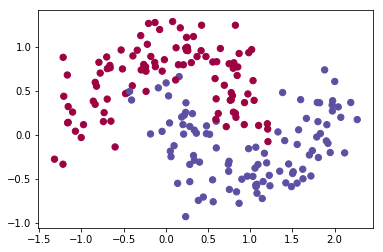

In [27]:
# load dataset
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()
datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

print(X.shape)
print(Y.shape)

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [28]:
# data transformation
print(iris.data.shape)
print(iris.target.shape)

X = X.T
Y = Y[0]

(150, 4)
(150,)


In [29]:
print(X.shape)
print(Y.shape)

(200, 2)
(200,)


## (1). Decision Tree

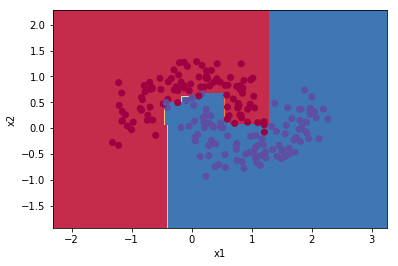

Number of mislabeled points out of a total 200 points : 0


In [30]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.reshape(Y.shape[0], 1))
plt.show()

y_pred = clf.predict(X)
print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0],(Y != y_pred).sum()))

# (2). Naïve Bayes

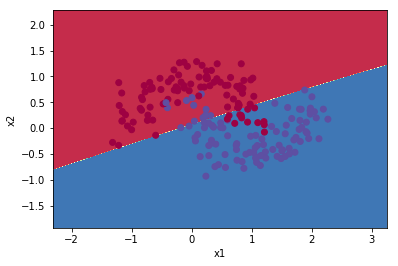

Number of mislabeled points out of a total 200 points : 26


In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

model = gnb.fit(X, Y)
y_pred = model.predict(X)

plot_decision_boundary(lambda x: model.predict(x), X.T, Y.reshape(Y.shape[0], 1))
plt.show()

print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0], (Y != y_pred).sum()))


# (3). logistic regression

In [32]:
from sklearn.linear_model import LogisticRegressionCV

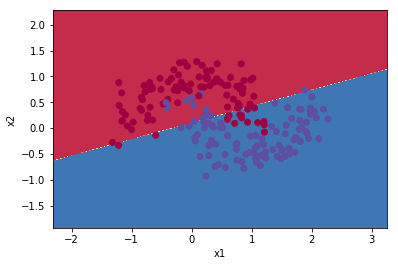

Accuracy of logistic regression: 86 % (percentage of correctly labelled datapoints)


In [33]:
clf = LogisticRegressionCV();
clf.fit(X, Y);

plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.reshape(Y.shape[0], 1))
plt.show()

LR_predictions = clf.predict(X)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

# (4). KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

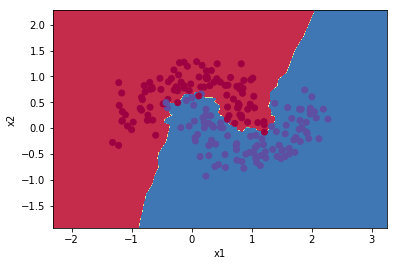

Number of mislabeled points out of a total 200 points : 4


In [35]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, Y) 

plot_decision_boundary(lambda x: neigh.predict(x), X.T, Y.reshape(Y.shape[0], 1))
plt.show()

y_pred = neigh.predict(X)
print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0],(Y != y_pred).sum()))

# (5). SVM

In [36]:
from sklearn.svm import SVC

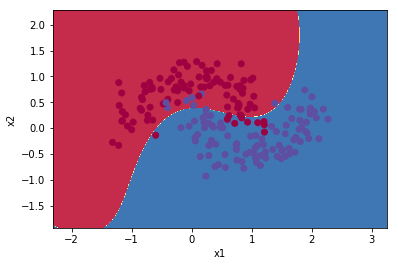

Number of mislabeled points out of a total 200 points : 18


In [37]:
clf = SVC()
clf.fit(X, Y) 

plot_decision_boundary(lambda x: clf.predict(x), X.T, Y.reshape(Y.shape[0], 1))
plt.show()

y_pred = clf.predict(X)
print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0],(Y != y_pred).sum()))

# 7.Homework

(2, 400)
(1, 400)


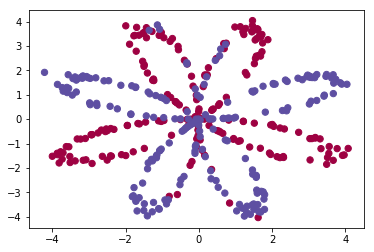

In [38]:
X, Y = load_planar_dataset()
print(X.shape)
print(Y.shape)
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);
plt.show()